In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import scipy
sys.path.append(os.path.join('..', 'importantfunctions'))
from ODEsolvers import *

In [3]:
#this is the diffeq that does the affect of body b on a
def Fab(ra,rb,t,mb,G=1): #where ra is the vector (x,y,vx,vy) for body a and rb is for body b
    dx=rb[0]-ra[0]
    dy=rb[1]-ra[1]
    
    vx=ra[2]
    vy=ra[3]
    
    R=(dx**2+dy**2)**0.5

    ax=G*mb*dx/(R**3)
    ay=G*mb*dy/(R**3)
    
    return np.array([vx,vy,ax,ay],float)

In [4]:
def diffeq(state,t,m1=1,m2=1,m3=1):
    r1=state[0:4]
    r2=state[4:8]
    r3=state[8:12]

    dr1=Fab(r1,r2,t,m2)+Fab(r1,r3,t,m3) #just adding up the effects of the different stars on each other
    dr2=Fab(r2,r1,t,m1)+Fab(r2,r3,t,m3)
    dr3=Fab(r3,r1,t,m1)+Fab(r3,r2,t,m2)

    return np.concatenate([dr1,dr2,dr3])

In [5]:
def diffeq_forscipy(t,state,m1=1,m2=1,m3=1):
    r1=state[0:4]
    r2=state[4:8]
    r3=state[8:12]

    dr1=Fab(r1,r2,t,m2)+Fab(r1,r3,t,m3) #just adding up the effects of the different stars on each other
    dr2=Fab(r2,r1,t,m1)+Fab(r2,r3,t,m3)
    dr3=Fab(r3,r1,t,m1)+Fab(r3,r2,t,m2)

    return np.concatenate([dr1,dr2,dr3])

In [6]:
R01=np.array([1,0,0,0.57735])
R02=np.array([-0.5,np.sqrt(3)/2,-0.5*np.sqrt(1/3),-np.sqrt(3)/2*np.sqrt(1/3)])
R03=np.array([-0.5,-np.sqrt(3)/2,0.5*np.sqrt(1/3),-np.sqrt(3)/2*np.sqrt(1/3)])
R0=np.concatenate([R01,R02,R03])

In [7]:
h=0.00001
Ts,Rs=RK4(diffeq,R0,h=h,N=1000000)

In [8]:
t_span=(Ts[0], Ts[-1])

In [9]:
results=scipy.integrate.solve_ivp(diffeq_forscipy,t_span=t_span,y0=R0,first_step=0.00001,t_eval=Ts)

In [10]:
Rs2=results.y.T

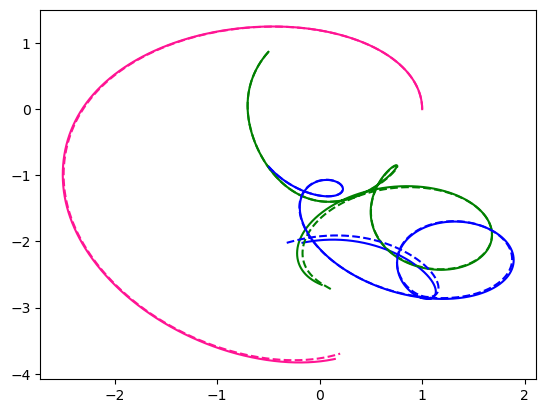

In [11]:
plt.plot(Rs[:,0],Rs[:,1],color='deeppink')
plt.plot(Rs[:,4],Rs[:,5],color='green')
plt.plot(Rs[:,8],Rs[:,9],color='blue')
plt.plot(Rs2[:,0],Rs2[:,1],linestyle='--',color='deeppink')
plt.plot(Rs2[:,4],Rs2[:,5],linestyle='--',color='green')
plt.plot(Rs2[:,8],Rs2[:,9],linestyle='--',color='blue')

In [24]:
R01=np.array([-1,0,0.3471168881,0.5327249454])
R02=np.array([1,0,0.3471168881,0.5327249454])
R03=np.array([0,0,-0.6942337762,-1.0654498908])
R0=np.concatenate([R01,R02,R03])

In [27]:
Ts,Rs=RK4(diffeq,R0,h=0.00001,maxt=7) #period is 6.3259139829

In [66]:
t_span=(Ts[0], Ts[-1])
results=scipy.integrate.solve_ivp(diffeq_forscipy,t_span=t_span,y0=R0,first_step=0.0000001,t_eval=Ts)
Rs2=results.y.T
results2=scipy.integrate.solve_ivp(diffeq_forscipy,method='DOP853',t_span=t_span,y0=R0,first_step=0.0000001,t_eval=Ts)
Rs3=results2.y.T

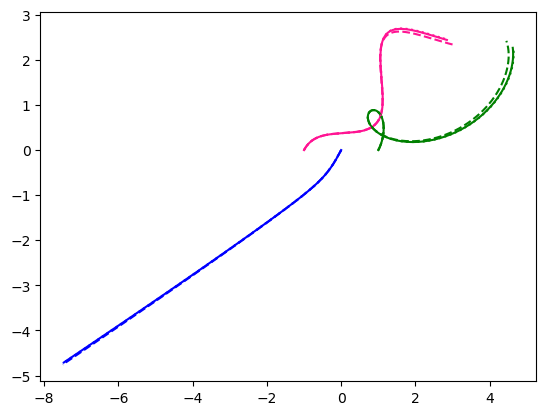

In [70]:
plt.plot(Rs[:,0],Rs[:,1],color='deeppink')
plt.plot(Rs[:,4],Rs[:,5],color='green')
plt.plot(Rs[:,8],Rs[:,9],color='blue')
plt.plot(Rs2[:,0],Rs2[:,1],linestyle='--',color='deeppink')
plt.plot(Rs2[:,4],Rs2[:,5],linestyle='--',color='green')
plt.plot(Rs2[:,8],Rs2[:,9],linestyle='--',color='blue')
plt.plot(Rs3[:,0],Rs3[:,1],linestyle=':',color='deeppink')
plt.plot(Rs3[:,4],Rs3[:,5],linestyle=':',color='green')
plt.plot(Rs3[:,8],Rs3[:,9],linestyle=':',color='blue')

In [75]:
#this is the butterfly I sequence orbit 1.2.A
R01=np.array([-1,0,0.306893,0.125507])
R02=np.array([1,0,0.306893,0.125507])
R03=np.array([0,0.3133550361,-0.613786,-0.251014])
R0=np.concatenate([R01,R02,R03])

In [78]:
Ts,Rs=RK4(diffeq,R0,h=0.00001,maxt=7) #period is 6.234671

In [80]:
t_span=(Ts[0], Ts[-1])
results=scipy.integrate.solve_ivp(diffeq_forscipy,t_span=t_span,y0=R0,first_step=0.0000001,t_eval=Ts)
Rs2=results.y.T
results2=scipy.integrate.solve_ivp(diffeq_forscipy,method='DOP853',t_span=t_span,y0=R0,first_step=0.0000001,t_eval=Ts)
Rs3=results2.y.T

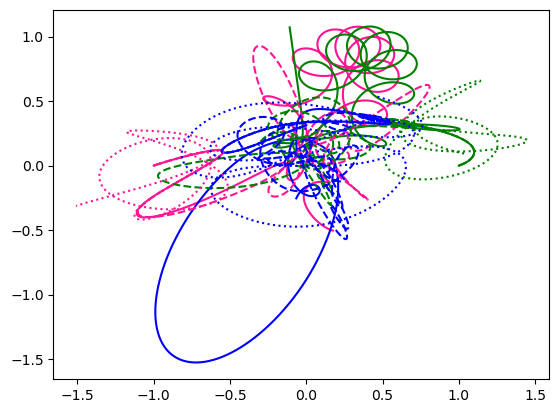

In [87]:
plt.plot(Rs[:,0],Rs[:,1],color='deeppink')
plt.plot(Rs[:,4],Rs[:,5],color='green')
plt.plot(Rs[:,8],Rs[:,9],color='blue')
plt.plot(Rs2[:,0],Rs2[:,1],linestyle='--',color='deeppink')
plt.plot(Rs2[:,4],Rs2[:,5],linestyle='--',color='green')
plt.plot(Rs2[:,8],Rs2[:,9],linestyle='--',color='blue')
plt.plot(Rs3[:,0],Rs3[:,1],linestyle=':',color='deeppink')
plt.plot(Rs3[:,4],Rs3[:,5],linestyle=':',color='green')
plt.plot(Rs3[:,8],Rs3[:,9],linestyle=':',color='blue')